In [ ]:
#https://gist.github.com/garnaat/833135 - for boto to s3 connection

In [ ]:
## Used for exporting to Python script
!/usr/bin/env python

In [247]:

import os
import yaml
import pandas as pd
import boto
import matplotlib.pyplot as plt
credentials = yaml.load(open(os.path.expanduser('~/api_credentials.yml')))
#credentials['twitter'].get('consumer_key')

In [3]:
from twitter import *

In [250]:
### Top 10 tweets function

def top_n_tweets_us(n):
    t = Twitter(
    auth=OAuth(credentials['twitter'].get('token'), credentials['twitter'].get('token_secret'),\
               credentials['twitter'].get('consumer_key'),credentials['twitter'].get('consumer_secret')))
    us_trends = t.trends.place(_id=23424977)
    trending_tweets_us = pd.DataFrame([i for i in us_trends[0]['trends']])
    trending_tweets_us = trending_tweets_us.sort_values(by='tweet_volume',ascending=False)
    html_trending_tweets = trending_tweets_us[:n].to_html()
    return html_trending_tweets_tweets

In [5]:
t = Twitter(
    auth=OAuth(credentials['twitter'].get('token'), credentials['twitter'].get('token_secret'),\
               credentials['twitter'].get('consumer_key'),credentials['twitter'].get('consumer_secret')))
us_trends = t.trends.place(_id=23424977)
trending_tweets_us = pd.DataFrame([i for i in us_trends[0]['trends']])
trending_tweets_us = trending_tweets_us.sort_values(by='tweet_volume',ascending=False)
html_trending_tweets = trending_tweets_us[:10].to_html()

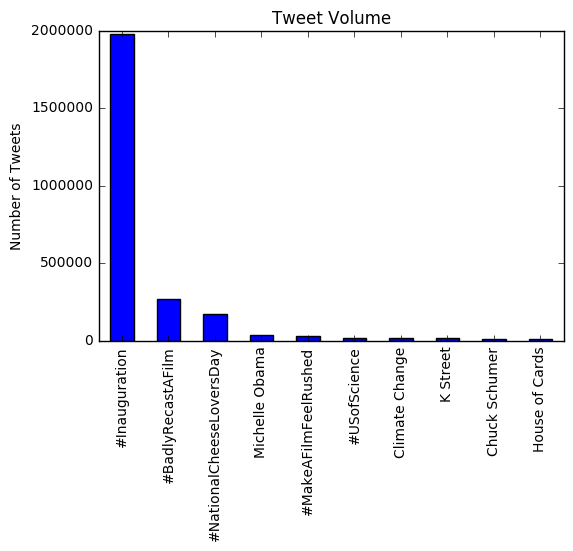

In [235]:
trending_tweets_us[:10].tweet_volume.plot.bar()
#labels = trending_tweets_us.name[:10]
plt.xticks([i for i in range(len(labels))],labels)
plt.title('Tweet Volume')
plt.ylabel('Number of Tweets')
savefig('top10trends.png')

In [167]:
conn = boto.connect_s3()

In [168]:
conn.get_all_buckets()

[<Bucket: 1776jhbucket>,
 <Bucket: jonathanjhilgart.com>,
 <Bucket: logs.jonathanjhilgart.com>,
 <Bucket: the_internet>,
 <Bucket: www.jonathanjhilgart.com>]

In [169]:
jh_bucket = conn.create_bucket('the_internet')

In [170]:
error_html = """
<html>
  <head><title>Something is wrong</title></head>
  <body><h2>Something is terribly wrong with my S3-based website</h2></body>
</html>"""

In [232]:
image_html = """<html> \
<head> Top 10</head> \
<blockquote class="imgur-embed-pub" lang="en" data-id="4BDzUXz">\
<a href="//imgur.com/4BDzUXz">View post on imgur.com</a>\
</blockquote><script async src="//s.imgur.com/min/embed.js" charset="utf-8"></script>
<p>End of graph</p>\
</html>"""

In [233]:
import StringIO
import urllib2


In [236]:
index_key = jh_bucket.new_key('index.html')
index_key.content_type = 'text/html'
index_key.set_contents_from_string(image_html, policy='public-read')
    
error_key = jh_bucket.new_key('error.html')
error_key.content_type = 'text/html'
error_key.set_contents_from_string(error_html, policy='public-read')

141

In [237]:
# Flask app ranked by tweet volume

In [ ]:
from flask import Flask
app = Flask(__name__)


@app.route("/")
def top_n_tweets_us():
    t = Twitter(
    auth=OAuth(credentials['twitter'].get('token'), credentials['twitter'].get('token_secret'),\
               credentials['twitter'].get('consumer_key'),credentials['twitter'].get('consumer_secret')))
    us_trends = t.trends.place(_id=23424977)
    trending_tweets_us = pd.DataFrame([i for i in us_trends[0]['trends']])
    trending_tweets_us = trending_tweets_us.sort_values(by='tweet_volume',ascending=False)
    html_trending_tweets = trending_tweets_us[:10].to_html()
    return html_trending_tweets
def hello():
    ### top 10 trending tweets
    return top_n_tweets_us()

if __name__ == "__main__":
    app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [22/Jan/2017 17:17:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:39] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jan/2017 17:17:49] "GET / HTTP/1.1" 200 -
